In [1]:
import pandas as pd

import numpy as np
from numpy import arange
from sklearn.linear_model import LinearRegression

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
import pyreadr
from mpl_toolkits.mplot3d import Axes3D

import country_converter as coco
cc = coco.CountryConverter()

In [2]:
CountryList = ['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus',
       'Benin', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Ethiopia', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro',
       'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Rwanda', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Tajikistan', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia',
       'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'Uruguay', 'Zambia', 'Zimbabwe'] #China, United States, Russia

In [3]:
TWWI = pd.read_csv("DOT/TWWI.csv").replace(0, np.nan).dropna()
TWWI = TWWI.merge(( TWWI.groupby('Country')[["Year","TWWI"]]
                   .rolling(5, min_periods=1, on='Year', closed = "right")
                   .mean().reset_index().drop(columns = "level_1")
                   .rename(columns = {'TWWI':'TWWIavg'}) ), on = ["Country", "Year"], how = "left")#.fillna(0) 
TWWI = TWWI.merge(( TWWI.groupby('Country')[["Year","dpTWWI"]]
                   .rolling(5, min_periods=1, on='Year', closed = "right")
                   .mean().reset_index().drop(columns = "level_1")
                   .rename(columns = {'dpTWWI':'dpTWWIavg'}) ), on = ["Country", "Year"], how = "left")#.fillna(0) 
TWWI = TWWI.drop_duplicates(subset = ['Country', 'Year'], keep = 'last')
TWWI = TWWI.reset_index(drop=True)
####TRADE WEIGHTED WORLD INCOME!!!!!

In [4]:
#TWWI[TWWI["Country"] == 'Germany']

In [5]:
tfp = pd.read_csv("tfp-at-constant-national-prices-20111.csv")
tfp = tfp.rename(columns = {"Entity" : "Country"})
tfp = tfp.replace({'United States' : 'USA'}).rename(columns = {"Total factor productivity index (using national accounts) (2017=1)" : "TFP"})
tfp["TFP"] = tfp["TFP"]*100

In [6]:
tfp["Country"] = cc.convert(names = tfp['Country'], to = "name_short")

In [7]:
pwt = pd.read_excel("pwt100.xlsx", sheet_name = "Data")[["country", "year", "ctfp", "cwtfp", "rtfpna", "rwtfpna"]]

#ctfp	TFP level at current PPPs (USA=1)
#cwtfp	Welfare-relevant TFP levels at current PPPs (USA=1)
#rtfpna	TFP at constant national prices (2017=1)
#rwtfpna	Welfare-relevant TFP at constant national prices (2017=1)

In [8]:
pwt = (pwt
    .rename(columns = {"country" : "Country", "year" : "Year", "rtfpna" : "TFP", "ctfp" : "CTFP", "cwtfp" : "CWTFP", "rwtfpna" : "WTFP"})
    .replace({'United States' : 'USA'}))

pwt[["CTFP", "CWTFP", "TFP", "WTFP"]]= pwt[["CTFP", "CWTFP", "TFP", "WTFP"]] * 100

##Removing USA as value always == 1
v = pwt[pwt["Country"] == "USA"]
v[["ctfp", "cwtfp"]] = np.nan
pwt[pwt["Country"] == "USA"] = v
pwt["Country"] = cc.convert(names = pwt['Country'], to = "name_short")
pwt[pwt["Country"] == "USA"].head(10)

C:\Users\joshu\AppData\Local\Temp\ipykernel_7380\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
C:\Users\joshu\AppData\Local\Temp\ipykernel_7380\142776407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v[["ctfp", "cwtfp"]] = np.nan
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of 

,Country,Year,CTFP,CWTFP,TFP,WTFP


In [9]:
WID_Data = pd.read_excel("WID_Data.xlsx", sheet_name = "Data")
WID_Data[WID_Data['Year'] == 2015].head(20)

,Percentile,Year,gptinc_992_j_CH\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSwitzerland,gptinc_992_j_QM\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nEastern Europe,gptinc_992_j_UY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nUruguay,gptinc_992_j_SY\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nSyrian Arab Republic,gptinc_992_j_GN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nGuinea,gptinc_992_j_OE-MER\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nOther MENA (at market exchange rate),gptinc_992_j_MW\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMalawi,gptinc_992_j_MN\nPre-tax national income \nTotal population | Gini coefficient | adults | equal split\nMongolia,...,sptinc_992_j_SN\nPre-tax national income \nBottom 50% | share | adults | equal split\nSenegal,sptinc_992_j_MG\nPre-tax national income \nBottom 50% | share | adults | equal split\nMadagascar,sptinc_992_j_CD\nPre-tax national income \nBottom 50% | share | adults | equal split\nDR Congo,sptinc_992_j_PL\nPre-tax national income \nBottom 50% | share | adults | equal split\nPoland,sptinc_992_j_EE\nPre-tax national income \nBottom 50% | share | adults | equal split\nEstonia,sptinc_992_j_QT-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nSouth Africa (at market exchange rate),sptinc_992_j_PG\nPre-tax national income \nBottom 50% | share | adults | equal split\nPapua New Guinea,sptinc_992_j_QO-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nNorth Africa (at market exchange rate),sptinc_992_j_QF-MER\nPre-tax national income \nBottom 50% | share | adults | equal split\nOceania (at market exchange rate),sptinc_992_j_ID\nPre-tax national income \nBottom 50% | share | adults | equal split\nIndonesia
65,pall,2015,0.432388,0.501557,0.540364,0.651422,0.538078,0.726932,0.651527,0.559097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,p0p50,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1338,0.1248,0.1264,0.1984,0.1729,0.0581,0.1297,0.1327,0.1171,0.1475
209,p50p90,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3891,0.3676,0.3852,0.4238,0.4692,0.2879,0.4082,0.3860,0.5114,0.4028
281,p90p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4771,0.5076,0.4884,0.3778,0.3579,0.6540,0.4621,0.4813,0.3714,0.4497
353,p99p100,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1318,0.1517,0.1463,0.1491,0.1114,0.1938,0.1628,0.1690,0.1296,0.1808


In [10]:
WID_G = WID_Data.iloc[:, 0:250]
WID_G = WID_G[WID_G.Percentile == 'pall'].drop(['Percentile'], axis = 1)

In [11]:
WID_G1 = WID_G
WID_G1 = WID_G1.melt(id_vars=["Year"], 
        var_name="Country", 
        value_name="Gini")

In [12]:
WID_G2 = WID_G1
WID_G2['Country'] = WID_G2['Country'].str.split('\n').str[3]
WID_G2 = WID_G2.replace({'Russian Federation' : 'Russia'})
WID_G2['Gini'] = WID_G2["Gini"]########################################################

In [13]:
WID_G2['Gini'].describe()

count    10584.000000
mean         0.580033
std          0.106081
min          0.208031
25%          0.499880
50%          0.593025
75%          0.651422
max          0.946778
Name: Gini, dtype: float64

In [14]:
#tfp_gini = pd.concat([tfp, WID_G2], axis=1, join="inner")
WID_G2["Country"] = cc.convert(names = WID_G2['Country'], to = "name_short")
tfp_gini = pwt.merge(WID_G2, on = ['Country', 'Year'], how="outer")
tfp_gini = tfp_gini[tfp_gini["Country"] != "South Africa"] ## Why is SA in the dataset twice

Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex


Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe not found in regex
Eastern Europe

In [15]:
swiid = pd.read_csv("swiid9_5\swiid9_5_summary.csv").replace(0,np.nan)

In [16]:
swiid = swiid.rename(columns = {'country' : 'Country', 'year': 'Year'})
swiid['Year'] = swiid['Year'].astype(int)
swiid.abs_red = swiid.gini_mkt - swiid.gini_disp
tfp_gini = tfp_gini.merge(swiid, on=['Country', 'Year'], how='outer')
tfp_gini

,Country,Year,CTFP,CWTFP,TFP,WTFP,Gini,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Aruba,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,Yugoslavia,1986,NaN,NaN,NaN,NaN,NaN,33.9,3.10,47.2,7.20,13.3,NaN,NaN,NaN
19453,Yugoslavia,1987,NaN,NaN,NaN,NaN,NaN,34.2,3.11,47.3,7.22,13.1,NaN,NaN,NaN
19454,Yugoslavia,1988,NaN,NaN,NaN,NaN,NaN,34.5,3.13,47.5,7.24,13.0,NaN,NaN,NaN
19455,Yugoslavia,1989,NaN,NaN,NaN,NaN,NaN,34.7,3.12,47.6,7.25,12.9,NaN,NaN,NaN


In [17]:
### Choosing Measure of gini
tfp_gini['WIID'] = tfp_gini['Gini']
tfp_gini['Gini'] = tfp_gini['gini_mkt']

In [18]:
"""
## IV
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)
model = linear_model.LinearRegression()
reg = model.fit(X[['lnGDPPC']], X['Gini'])
print(model.coef_[0])
"""

'\n## IV\nTGall[\'Gini\'] = TGall[\'Gini\'].replace(0, np.nan)\nX = TGall[["lnGDPPC", "Gini"]].dropna(axis=0)\nmodel = linear_model.LinearRegression()\nreg = model.fit(X[[\'lnGDPPC\']], X[\'Gini\'])\nprint(model.coef_[0])\n'

In [19]:
# Normalize Gini Coefficient
#tfp_gini["NGini"] = np.nan
tfp_gini["-Gini"] = np.nan
tfp_gini["dGini"] = np.nan
tfp_gini["d5Gini"] = np.nan
tfp_gini["dpGini"] = np.nan
tfp_gini["d5pGini"] = np.nan
tfp_gini["dNGini"] = np.nan
tfp_gini["dpGinim5"] = np.nan
tfp_gini["Ginim5"] = np.nan

"""
# Find the changes tfp and gini
tfp_gini["dTFP"] = np.nan
tfp_gini["dpTFP"] = np.nan
tfp_gini["dpTFPm1"] = np.nan
tfp_gini["dpTFPm2"] = np.nan
tfp_gini["dpTFPavg"] = np.nan
tfp_gini["-dpTFP^2"] = np.nan
tfp_gini["dpTFP^2"] = np.nan
tfp_gini["dpTFP^3"] = np.nan
tfp_gini["log(dpTFP)"] = np.nan

tfp_gini["dCTFP"] = np.nan
tfp_gini["dpCTFP"] = np.nan
tfp_gini["dCTFPm1"] = np.nan
tfp_gini["dCTFPm2"] = np.nan
tfp_gini["dCTFPavg"] = np.nan
tfp_gini["-dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^2"] = np.nan
tfp_gini["dpCTFP^3"] = np.nan

tfp_gini["dWTFP"] = np.nan
tfp_gini["dWTFPm1"] = np.nan
tfp_gini["dWTFPm2"] = np.nan
tfp_gini["dWTFPavg"] = np.nan
tfp_gini["-dWTFP^2"] = np.nan
tfp_gini["dWTFP^2"] = np.nan
tfp_gini["dWTFP^3"] = np.nan
"""


for x in tfp_gini["Country"].unique():
    temp = tfp_gini[tfp_gini["Country"] == x]

    #b = float(temp.loc[temp["Year"] == 2017, "Gini"])
    #temp["NGini"] = temp["Gini"].div(b) * 100

    temp["-Gini"] = temp["Gini"] - temp["Gini"].min()

    temp.dGini = temp['Gini'].diff(periods=1)
    temp.d5Gini = temp['Gini'].diff(periods=5)
    temp.dpGini = temp['dGini'].div(temp['Gini']) * 100
    temp.d5pGini = temp['d5Gini'].div(temp['Gini']) * 100
    #temp.dNGini = temp['NGini'].diff(periods=1)
    temp["dpGinim5"] = temp.dpGini.shift(+5)
    temp.Ginim5 = temp.Gini.shift(+5)

    """
    temp["dTFP"] = temp['TFP'].diff(periods=1)
    temp["dpTFP"] = temp['dTFP'].div(temp['TFP'])*100
    temp["dpTFPm1"] = temp.dpTFP.shift(+1)
    temp["dpTFPm2"] = temp.dpTFPm1.shift(+1)
    temp["dpTFPavg"] = (temp["dpTFP"] + temp["dpTFPm1"] + temp["dpTFPm2"]).div(3)
    temp["-dpTFP^2"] = temp.dTFP*abs(temp.dTFP)
    temp["dpTFP^2"] = temp.dpTFP ** 2
    temp["dpTFP^3"] = temp.dpTFP ** 3
    temp["log(dpTFP)"] = np.log(temp["dpTFP"])

    temp["dCTFP"] = temp['CTFP'].diff(periods=1)
    temp["dpCTFP"] = temp['dCTFP'].div(temp['CTFP'])*100
    temp["dCTFPm1"] = temp.dCTFP.shift(+1)
    temp["dCTFPm2"] = temp.dCTFPm1.shift(+1)
    temp["dCTFPavg"] = (temp["dCTFP"] + temp["dCTFPm1"] + temp["dCTFPm2"]).div(3)
    temp["-dpCTFP^2"] = temp.dCTFP*abs(temp.dCTFP)
    temp["dpCTFP^2"] = temp.dpCTFP ** 2 
    temp["dpCTFP^3"] = temp.dpCTFP ** 3

    temp["dWTFP"] = temp['WTFP'].diff(periods=1)
    temp["dWTFPm1"] = temp.dWTFP.shift(+1)
    temp["dWTFPm2"] = temp.dWTFPm1.shift(+1)
    temp["dWTFPavg"] = (temp["dWTFP"] + temp["dWTFPm1"] + temp["dWTFPm2"]).div(3)
    temp["-dWTFP^2"] = temp.dWTFP*abs(temp.dWTFP)
    temp["dWTFP^2"] = temp.dWTFP ** 2
    temp["dWTFP^3"] = temp.dWTFP ** 3
    """
    
    tfp_gini[tfp_gini["Country"] == x] = temp

tfp_gini = tfp_gini.sort_values(by = ["Country", "Year"])

C:\Users\joshu\AppData\Local\Temp\ipykernel_7380\1675544087.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["-Gini"] = temp["Gini"] - temp["Gini"].min()
C:\Users\joshu\AppData\Local\Temp\ipykernel_7380\1675544087.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.dGini = temp['Gini'].diff(periods=1)
C:\Users\joshu\AppData\Local\Temp\ipykernel_7380\1675544087.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [20]:
##Add GDP per capita before removing years
GDPpc_Data = (pd.read_excel("mpd2020.xlsx", sheet_name = "Full data")
                .drop(columns = ["countrycode"])
                .rename(columns = {"gdppc" : "GDPPC", "country" : "Country", "year" : "Year"})
                .replace({'United States' : 'USA'}))
GDPpc_Data['GDP'] = GDPpc_Data['GDPPC'] * GDPpc_Data['pop']

##ONLY if using relative GDPPC###

GDPpc_Data["Country"] = cc.convert(names = GDPpc_Data['Country'], to = "name_short")
GDPpc_Data = GDPpc_Data.replace("not found",np.nan).replace(0,np.nan).dropna()

GDPpc_Data = GDPpc_Data[GDPpc_Data.Country.isin(CountryList)]
GDPpc_Data['RelGDPPC']  = GDPpc_Data['GDPPC'] / GDPpc_Data.groupby(['Year'])['GDPPC'].transform('max')

GNId = pd.read_excel("GNIclean.xlsx").drop(columns = ["Indicator Name", "Indicator Code"]).rename(columns = {"Country Name": "Country"})
GNId = pd.melt(GNId, id_vars=["Country", "Country Code"], var_name="Year", value_name="GNI")
GNId["Country"] = cc.convert(names = GNId['Country'], to = "name_short")
GNId = GNId.replace("not found",np.nan).replace(0,np.nan).dropna()
GNId.Year = GNId.Year.astype(int)

GDPpc_Data = GDPpc_Data.merge(GNId[['Country', 'Year', 'GNI']], on = ['Country', 'Year'], how = 'left')

TGall = tfp_gini.merge(GDPpc_Data, on = ['Country', 'Year'], how = 'outer')
TGall = TGall[TGall.GDPPC != 0]

######## GNI regression only
#TGall.GDPPC = TGall.GNI / TGall.pop
#####

TGall["dGDPPC"] = np.nan
TGall["d5GDPPC"] = np.nan
TGall["dpGDPPC"] = np.nan
TGall["d5pGDPPC"] = np.nan
TGall["dpGDPPC^2"] = np.nan
TGall["lnGDPPC"] = np.nan

##Differnece in GDPpc_Data
for x in TGall["Country"].unique():
    temp = TGall[TGall["Country"] == x]

    temp["dGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["d5GDPPC"] = temp['GDPPC'].diff(periods=5)
    #temp["dpGDPPC"] = temp["dGDPPC"].div(temp['GDPPC'])*100
    #temp["d5pGDPPC"] = temp["d5GDPPC"].div(temp['GDPPC'])*100
    temp["dpGDPPC^2"] = temp["dpGDPPC"] ** 2
    temp["lnGDPPC"] = np.log(temp["GDPPC"])
    temp["dpGDPPC"] = temp['GDPPC'].diff(periods=1)
    temp["d5pGDPPC"] = temp['lnGDPPC'].diff(periods=5)

    TGall[TGall["Country"] == x] = temp

D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D.R. of the Congo not found in regex
D

In [21]:
GNId

,Country,Country Code,Year,GNI
545,Australia,AUS,1962,1870.0
546,Austria,AUT,1962,1060.0
548,Burundi,BDI,1962,70.0
549,Belgium,BEL,1962,1450.0
550,Benin,BEN,1962,90.0
...,...,...,...,...
16752,Samoa,WSM,2022,3660.0
16753,Kosovo,XKX,2022,5660.0
16755,South Africa,ZAF,2022,6780.0
16756,Zambia,ZMB,2022,1240.0


In [22]:
TGall = TGall.sort_values(by = ["Country", "Year"])

In [23]:
TGall = TGall[TGall.Country.isin(CountryList)]
TGall['RellnGDPPC']  = TGall ['lnGDPPC']/ TGall.groupby(['Year'])['lnGDPPC'].transform('max')
TGall['RellnGDPPCm5'] = TGall.groupby('Country')['RellnGDPPC'].shift(5)
TGall['GDPPCm5'] = TGall.groupby('Country')['GDPPC'].shift(5)

In [24]:
TGall = TGall.sort_values(by = ["Country", "Year"])

In [25]:
TGall["Gini2m5"] = TGall["Ginim5"]**2
TGall["lnGG"] = TGall["lnGDPPC"].mul(TGall['Gini'])
TGall["lnGGm5"] = TGall.groupby('Country')["lnGG"].shift(5)
TGall["lnGDPPCm5"] = TGall.groupby('Country')["lnGDPPC"].shift(5)

TGall['RellnGGm5'] = TGall['RellnGDPPCm5'] * TGall["Ginim5"]
TGall['RellnGG2m5'] = TGall['RellnGDPPCm5'] * TGall["Gini2m5"]
TGall = TGall.replace([np.nan, -np.inf], 0)

In [26]:
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)

In [27]:
TGall = TGall.merge(TWWI, on = ["Country", "Year"], how = "left")

https://ourworldindata.org/taxation 

In [28]:
tmitr = (pd.read_csv("top-income-tax-rates-piketty.csv")
        .rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        .drop(columns = "Code")
        .replace({'United States' : 'USA'}))
tmitr["Country"] = cc.convert(names = tmitr['Country'], to = "name_short")
TGall = TGall.merge(tmitr, on = ['Country', 'Year'], how = 'left')

In [29]:
oil = (pd.read_csv("API_TX.VAL.FUEL.ZS.UN_DS2_en_csv_v2_5996827.csv") #World Bank, % merchendise oil
        #.rename(columns = {"Entity" : "Country", "Top marginal income tax rate (WIR (2018))": "TMITR"})
        #.drop(columns = "Code")
        .replace({'United States' : 'USA', 'Country Name': 'Country'}))
oil = oil.drop(['Indicator Code', 'Indicator Name', 'Country Code'], axis = 1)
oil = pd.melt(oil, id_vars=['Country Name'], value_vars= oil.columns[1:64])
oil = oil.rename(columns={"Country Name": "Country", "variable": "Year", "value": "Oil"})
oil['Year'] = oil['Year'].astype(int)
oil['Oil'] = ( oil.groupby('Country', group_keys=False)['Oil']
                         .apply(lambda x: x.interpolate(method = 'linear', limit_area='inside')) ) # Interpolation of missing values in oil, linear

oil = oil.merge(GDPpc_Data, how = 'left', on = ['Country', 'Year'])

oil['OdivGDP'] = oil.Oil.div(oil.GDP) #oil exports as % gdp

OilW = ( oil.groupby('Country')[["Year",'OdivGDP']]
        .rolling(5, min_periods=1, on='Year', closed = "left")
        .mean().reset_index().drop(columns = "level_1")
        .rename(columns = {'OdivGDP':'OilW'}).fillna(0) ) ##calculating oil averge over previous 5 years
oil = oil.merge(OilW, on= ['Year','Country'], how = "outer")

oil["Country"] = cc.convert(names = oil['Country'], to = "name_short")

TGall = TGall.merge(oil, on = ['Country', 'Year'], how = 'left' )

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

In [30]:
TGall = TGall.sort_values(by = ["Country", "Year"])

In [31]:
Pr = ( pd.read_excel("statistic_id262858_opec-oil-price-annually-1960-2024.xlsx", sheet_name="Data", skiprows = 4)
      .drop(columns = "Unnamed: 0")
      .rename(columns = {"Unnamed: 1": "Year", "Unnamed: 2": "Price"}) )
Pr.drop(Pr.tail(1).index,inplace=True)
Pr['Year'] = Pr['Year'].astype(int)
Pr['lnP'] = np.log(Pr['Price'])
Pr['dlnP'] = Pr["lnP"].diff(1) ##calculating oil over previous 5 years
TGall = TGall.merge(Pr, on = ['Year'], how = 'left')
TGall['OilP'] = TGall['Oil'].mul(TGall['Price'])
TGall['OlnP'] = TGall['Oil'].mul(TGall['lnP'])

In [32]:
Pr

,Year,Price,lnP,dlnP
0,1960,1.63,0.488580,NaN
1,1961,1.57,0.451076,-0.037504
2,1962,1.52,0.418710,-0.032365
3,1963,1.50,0.405465,-0.013245
4,1964,1.45,0.371564,-0.033902
...,...,...,...,...
59,2019,64.04,4.159508,-0.085840
60,2020,41.47,3.724970,-0.434538
61,2021,69.89,4.246923,0.521952
62,2022,100.08,4.605970,0.359047


In [33]:
TGall = TGall[TGall.Country !=  'not found']

In [34]:
save = TGall

In [71]:
TGall = save

In [72]:
TGall['OilWP'] = TGall['OilW'] * TGall['dlnP']

OPS = ( TGall[["Year", 'Country', 'OilWP']].groupby('Country')[["Year",'OilWP']]
        .rolling(5, min_periods=1, on='Year', closed = "right")
        .mean().reset_index().drop(columns = "level_1")
        .rename(columns = {'OilWP':'OPS'}) ) ##calculating oil averge over previous 5 years
OPS = OPS[OPS.Country != 'not found']
OPS
TGall = TGall.merge(OPS, on= ['Year','Country'], how = "left")

In [73]:
TGall["lnGDPPC2"] = TGall["lnGDPPC"] ** 2
TGall['lnGDPPC2m5'] = TGall['lnGDPPCm5'] ** 2

In [74]:
FinDev = pd.read_excel("FinDev.xlsx").replace(0, np.nan).dropna()
FinDev.Year = FinDev.Year.astype(int)
FinDev = FinDev[FinDev['Country'] != "Aruba, Kingdom of the Netherlands"]
FinDev = FinDev[FinDev['Country'] != "Curaçao, Kingdom of the Netherlands"] #countries that don't matter
FinDev = FinDev[FinDev['Country'] != "Sint Maarten, Kingdom of the Netherlands"]

FinDev = FinDev.merge(( FinDev.groupby('Country')[["Year","FDI"]]
                   .rolling(5, min_periods=1, on='Year', closed = "right")
                   .mean().reset_index().drop(columns = "level_1")
                   .rename(columns = {'FDI':'FDIavg'}) ), on = ["Country", "Year"], how = "left")#.fillna(0) 

FinDev["Country"] = cc.convert(names = FinDev['Country'], to = "name_short")
FinDev = FinDev.replace("not found",np.nan).replace(0,np.nan).dropna()

TGall = TGall.merge(FinDev, on=['Year','Country'], how = 'left')

In [75]:
## IV
TGall = TGall[TGall.Year >= 1960] # remove years before 1960
TGall = TGall[TGall.Year <= 2018]
TGall['Gini'] = TGall['Gini'].replace(0, np.nan)
X = TGall[["Year", "Country", "dpTWWI", "TWWI", "Gini", "OilWP", "lnGDPPC"]].replace(0, np.nan).dropna(axis=0)
X = X.groupby('Country').filter(lambda x: len(x) >= 5) #remove countries with less then 4 data points
X = X.groupby('Year').filter(lambda x: len(x) >= 10) #remove years with less then 10 entries
X = X[X.Country.isin(CountryList)] #make sure that the country is in our list of countries
X = X[["dpTWWI", "TWWI", "Gini", "OilWP", "lnGDPPC"]]
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
X['B0'] = 1
model = linear_model.LinearRegression(fit_intercept=False)
reg = model.fit(X[["dpTWWI", 'TWWI', 'OilWP', 'lnGDPPC', 'B0']], X['Gini'])
print(model.coef_)
## the beta on gdppc is 100 times higher with the other variables included
AdjGDP = model.coef_[3]
#TGall['predIVGini'] = reg.predict(TGall['lnGDPPC'].values.reshape(-1, 1))
TGall['IVGini'] = TGall['Gini'] - (TGall['lnGDPPC'].mul(AdjGDP))
#TGall['IVGini'] = TGall['Gini'] - TGall['predIVGini']

TGall['IVGini'] = TGall['IVGini'].replace(0, np.nan)
TGall['IVGinim5'] = TGall.groupby('Country')["IVGini"].shift(5)

TGall["IVlnGG"] = TGall["lnGDPPC"].mul(TGall['IVGini'])
TGall["IVlnGGm5"] = TGall.groupby('Country')["IVlnGG"].shift(5)

TGall['IVGini2m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5'])
TGall['IVlnGG2m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5'])

TGall['IVGini3m5'] = TGall['IVGinim5'].mul(TGall['IVGinim5']).mul(TGall['IVGinim5'])
TGall['IVlnGG3m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPCm5']).mul(TGall['IVGinim5'])

TGall['IVRellnGGm5'] = TGall['RellnGDPPCm5'] * TGall["IVGinim5"]
TGall['IVRellnGG2m5'] = TGall['RellnGDPPCm5'] * TGall["IVGini2m5"]
TGall = TGall.rename(columns = {"RelGDPPC_x": "RelGDPPC"})
TGall['RelGDPPCm5'] = TGall.groupby('Country')['RelGDPPC'].shift(5)
TGall['IVRelGGm5'] = TGall['RelGDPPCm5'] * TGall["IVGinim5"]
TGall['IVRelGG2m5'] = TGall['RelGDPPCm5'] * TGall["IVGini2m5"]

#################### GDPPC 2
"""
TGall["IVlnGG2"] = TGall["lnGDPPC2"].mul(TGall['IVGini'])
TGall["IVlnG2Gm5"] = TGall["IVlnGG2"].shift(5)

TGall['IVlnG2G2m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPC2m5'])

TGall['IVlnG2G3m5'] = TGall['IVGini2m5'].mul(TGall['lnGDPPC2m5']).mul(TGall['IVGinim5'])
"""

[-1.55005311e+05 -1.42383271e-06 -8.83150637e+05  3.68912110e-01
  4.32145244e+01]


'\nTGall["IVlnGG2"] = TGall["lnGDPPC2"].mul(TGall[\'IVGini\'])\nTGall["IVlnG2Gm5"] = TGall["IVlnGG2"].shift(5)\n\nTGall[\'IVlnG2G2m5\'] = TGall[\'IVGini2m5\'].mul(TGall[\'lnGDPPC2m5\'])\n\nTGall[\'IVlnG2G3m5\'] = TGall[\'IVGini2m5\'].mul(TGall[\'lnGDPPC2m5\']).mul(TGall[\'IVGinim5\'])\n'

In [76]:
### This is just a proof
"""
TGall['Gini'] = tfp_gini['Gini'].replace(0, np.nan)
temp = TGall[["lnGDPPC", "Gini", "TWWI"]].dropna(axis=0)
a = np.cov([temp['TWWI'], temp['Gini']])[0][1] / np.cov([temp['lnGDPPC'], temp['TWWI']])[0][1]
temp['Z'] = temp['Gini'] - (a * temp['lnGDPPC'])
b = np.cov([temp['Z'], temp['lnGDPPC']])[0][1] / np.cov([temp['Gini'], temp['Z']])[0][1]
b
"""

'\nTGall[\'Gini\'] = tfp_gini[\'Gini\'].replace(0, np.nan)\ntemp = TGall[["lnGDPPC", "Gini", "TWWI"]].dropna(axis=0)\na = np.cov([temp[\'TWWI\'], temp[\'Gini\']])[0][1] / np.cov([temp[\'lnGDPPC\'], temp[\'TWWI\']])[0][1]\ntemp[\'Z\'] = temp[\'Gini\'] - (a * temp[\'lnGDPPC\'])\nb = np.cov([temp[\'Z\'], temp[\'lnGDPPC\']])[0][1] / np.cov([temp[\'Gini\'], temp[\'Z\']])[0][1]\nb\n'

In [77]:
hdiData  = (pd.read_csv("HDItimeseries.csv")
            .iloc[:, 0:34]
            .drop(columns=['hdi_rank_2021']))
hdiData = pd.melt(hdiData, id_vars=["iso3", "country", "hdicode", "region"], var_name="Year", value_name="HDI")
hdiData.Year = hdiData.Year.str.split("_").str[1].astype(int)
hdiData["country"] = cc.convert(names = hdiData['country'], to = "name_short")
#hdiData["iso3"] = cc.convert(names = hdiData['iso3'], to = "name_short")
hdiData = hdiData.dropna().rename(columns={"country":"Country"})
hdiData

Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in

Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex
Very high human development not found in regex
High human development not found in regex
Medium human development not found in

,iso3,Country,hdicode,region,Year,HDI
0,AFG,Afghanistan,Low,SA,1990,0.273
2,ALB,Albania,High,ECA,1990,0.647
4,ARE,United Arab Emirates,Very High,AS,1990,0.728
5,ARG,Argentina,Very High,LAC,1990,0.723
6,ARM,Armenia,High,ECA,1990,0.656
...,...,...,...,...,...,...
5958,WSM,Samoa,High,EAP,2018,0.716
5959,YEM,Yemen,Low,AS,2018,0.459
5960,ZAF,South Africa,High,SSA,2018,0.726
5961,ZMB,Zambia,Medium,SSA,2018,0.572


In [78]:
TGall.replace("not found",np.nan).dropna()
TGall = TGall.merge(hdiData, on = ['Country', 'Year'], how = 'left')
TGall.HDI = TGall.HDI.mul(100)
TGall = TGall.merge(GNId, on = ['Country', 'Year'], how = "left")

In [79]:
TGall["lnHDI"] = np.log(TGall["HDI"])
TGall["lnHDIm5"] = TGall.groupby('Country')["lnHDI"].shift(5)
TGall["GHDIm5"] = TGall["lnHDIm5"].mul(TGall["Ginim5"])
TGall["GHDI2m5"] = TGall["lnHDIm5"].mul(TGall["Gini2m5"])

https://ourworldindata.org/taxation

https://stats.oecd.org/viewhtml.aspx?datasetcode=TABLE_I7&lang=en 

In [80]:
TMITR = (pd.read_csv("TMITR.csv")
        .drop(columns = ["COU", "YEA", "Unit Code", "Unit", "PowerCode Code", "PowerCode", "Reference Period Code", "Reference Period", "Flag Codes", "Flags"]))
TMITR = (TMITR[TMITR["TAX"] == "TOP_TRATE"]
        .drop(columns = ["TAX", "Income Tax"])
        .rename(columns = {"Value" : "TMITR2"})
        .replace({'United States' : 'USA'}))
TMITR["Country"] = cc.convert(names = TMITR['Country'], to = "name_short")
TGall = TGall.merge(TMITR, on = ['Country', 'Year'], how = 'left')

In [81]:
nData = ( pd.read_csv("API_SP.POP.GROW_DS2_en_csv_v2_5995052.csv")
         .drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)
         .rename(columns={"Country Name": "Country"})
)
nData = pd.melt(nData, id_vars=["Country"], var_name="Year", value_name="n")
nData.Year = nData.Year.astype(int)

In [82]:
nData["Country"] = cc.convert(names = nData['Country'], to = "name_short")
nData = nData.replace("not found",np.nan).dropna()
TGall = TGall.merge(nData, on=["Country", "Year"], how="left")

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex


Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not found in regex
Low income not found in regex
Lower middle income not found in regex
Low & middle income not found in regex
La

In [83]:
EXP = pd.read_excel("ExportClean.xlsx")
EXP["Country"] = cc.convert(names = EXP['Country'], to = "name_short")
EXP = EXP.melt(id_vars = ["Country"], var_name= "Year", value_name="Exports")
EXP

World not found in regex
Advanced Economies not found in regex
Euro Area not found in regex
Belgium-Luxembourg not found in regex
Emerging and Developing Economies not found in regex
Emerging and Developing Asia not found in regex
Asia not specified not found in regex
Emerging and Developing Europe not found in regex
Serbia and Montenegro not found in regex
Yugoslavia not found in regex
USSR not found in regex
Europe not specified not found in regex
Middle East and Central Asia not found in regex
Middle East and Central Asia not specified not found in regex
Sub-Saharan Africa not found in regex
Africa not specified not found in regex
Western Hemisphere not found in regex
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than one regular expression match for Aruba, Kingdom of the Netherlands
More than on

,Country,Year,Exports
0,Australia,1961,1.649800e+03
1,not found,1961,1.118932e+05
2,not found,1961,8.061409e+04
3,not found,1961,3.349622e+04
4,Austria,1961,1.287490e+03
...,...,...,...
15123,not found,2022,7.793334e+05
15124,not found,2022,8.527102e+05
15125,not found,2022,7.386401e+06
15126,not found,2022,1.186943e+06


Do a test where we show that linear is not good

In [84]:
#pd.get_dummies(TGall["Country"])

In [85]:
TGall.Price.isna().sum() / len(TGall.Price)

0.0

In [86]:
## State Fixed Effects
#TGallFE = pd.concat([TGall, pd.get_dummies(TGall["Country"])], axis = 1)

In [87]:
#TGallFE.iloc[:,TGallFE.columns.get_loc("Albania"):].tail()

In [88]:
TGall = TGall[TGall.Country !=  'not found']

In [89]:
#intensity level 2 only , https://ucdp.uu.se/downloads/index.html#armedconflict
Conf = pd.read_excel("Dyadic_v23_1.xlsx")[['location', 'year', 'intensity_level']].rename(columns  = {'year': "Year", "location": "Country"})
Conf = Conf[Conf['intensity_level'] == 2].drop(columns  = "intensity_level")
Conf['Country'] = Conf['Country'].str.split(',')
Conf = Conf.explode('Country')
Conf.Country = cc.convert(names = Conf['Country'], to = "name_short")
Conf = Conf[Conf.Country !=  'not found']
Conf['Conflict'] = 1
#Conf['Adj5']  = 
Conf = Conf.sort_values(by = ["Country", "Year"])
#Conf['Adj5'] = Conf.groupby('Country')['Conflict'].shift(5)
Conf

Hyderabad not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
South Vietnam not found in regex
Hyderabad not found in regex
Hyderabad not found in regex


,Country,Year,Conflict
428,Afghanistan,1978,1
429,Afghanistan,1979,1
430,Afghanistan,1980,1
440,Afghanistan,1980,1
447,Afghanistan,1980,1
...,...,...,...
676,Yemen,2022,1
371,Zimbabwe,1976,1
372,Zimbabwe,1977,1
373,Zimbabwe,1978,1


In [90]:

TGall = TGall.merge(Conf, on = ["Year", "Country"], how = "left")

In [91]:
### Remove all years with conflict and 5 years before or after
TGall.Conflict = TGall.Conflict.fillna(0)
TGall["Con5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(5))
                  .fillna(0)
                  .astype(int))
TGall["Con-5"] = (TGall.groupby('Country')['Conflict']
                  .transform(lambda x: x.shift(-5))
                  .fillna(0)
                  .astype(int))
TGall = TGall[TGall['Conflict'] == 0]
TGall = TGall[TGall['Con5'] == 0]
TGall = TGall[TGall['Con-5'] == 0]
TGall = TGall.drop(columns = ["Conflict", "Con5", "Con-5"])

In [92]:
"""
def cd(country = "Canada"):
    return tfp_gini[tfp_gini['Country'] == country]
"""

'\ndef cd(country = "Canada"):\n    return tfp_gini[tfp_gini[\'Country\'] == country]\n'

In [93]:
"""
def all(country = "Canada"):
        return TGall[TGall['Country'] == country]
        """

'\ndef all(country = "Canada"):\n        return TGall[TGall[\'Country\'] == country]\n        '

In [94]:
def TGC(vars = ["TFP", "Gini", "-Gini", "dpTFP", "dpGini", "dNGini"], FE = False, Year = False):
    TGallD = TGall[vars]
    if Year == True:
        TGallD = pd.concat([TGall["Year"], TGallD], axis = 1)
    if FE == True:
        TGallD = pd.concat([TGallD, pd.get_dummies(TGall["Country"])], axis = 1)
    #if d == True:
    #    TGallD = pd.concat([TGall["dpGDPPC"], TGallD], axis = 1)
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD.replace(0, np.nan).dropna(axis = 0)
    #TGallD = TGallD[(np.abs(stats.zscore(TGallD[vars])) < 3).all(axis=1)]
    return TGallD

In [95]:
def TGCc(vars = ["TFP", "Gini", "NGini", "-Gini", "dTFP", "dGini", "dNGini", "dTFPavg"], country = "Canada"):
    TGallD = TGall[TGall['Country'] == country]
    TGallD = TGallD[vars].dropna()
    #if 'dGini' in TGallD.columns:
    #    TGallD = pd.concat([TGallD[TGallD["dGini"] < -.01], TGallD[TGallD["dGini"] > .01]])
    TGallD = TGallD[(np.abs(stats.zscore(TGallD)) < 3).all(axis=1)]
    return TGallD

In [96]:
TGall = TGall[TGall.Year >  1959]

In [97]:
# TGCc(["CTFP", "TFP", "dCTFP", "dTFP", "dpCTFP", "dpTFP"], country = "Canada").tail(15).to_excel("dTFP_Canada.xlsx")

In [98]:
print(len(WID_G2))
#Need to compare country names
print(len(tfp_gini))
print(len(swiid))

17856
19457
6109


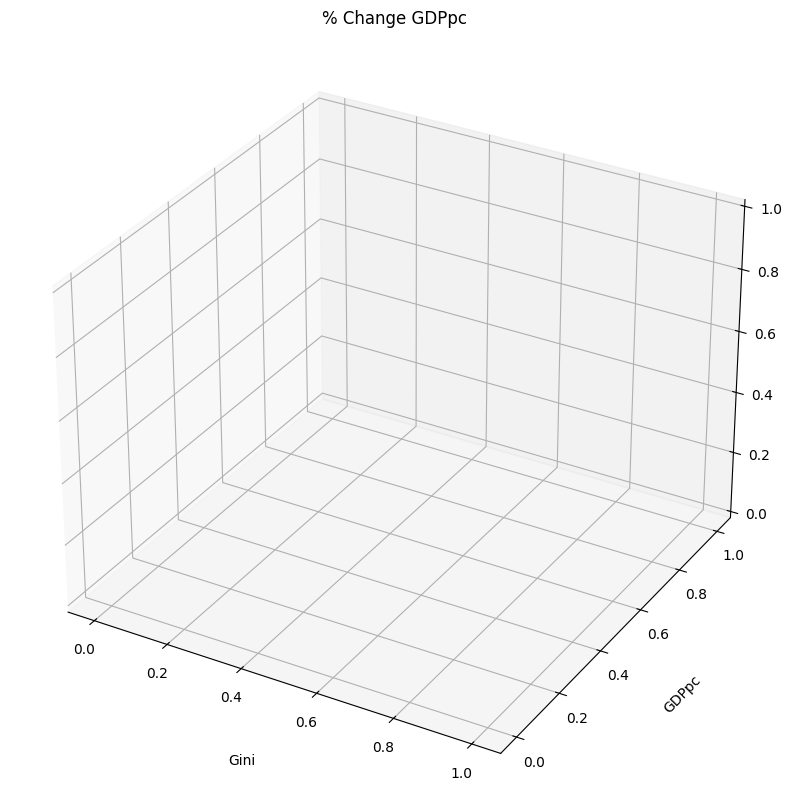

<Axes: >

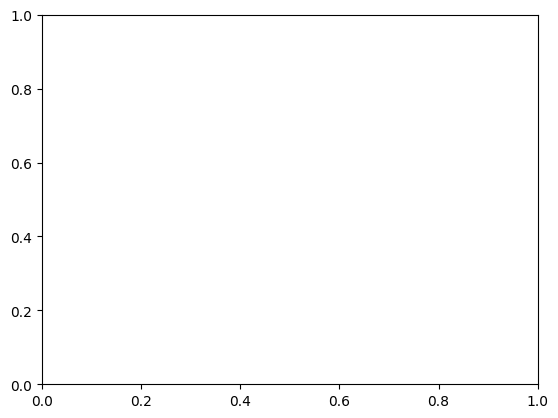

In [100]:
temp = TGall[TGall.Country == ""]
temp = temp[['IVGinim5', "lnGDPPCm5", "lnGDPPC"]].replace(0,np.nan).dropna()
x = temp['IVGinim5']
y = temp['lnGDPPCm5']
z = temp['lnGDPPC'] - temp['lnGDPPCm5']

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b')
ax.set_title('% Change GDPpc')

# Set axes label
ax.set_xlabel('Gini', labelpad=20)
ax.set_ylabel('GDPpc', labelpad=20)
ax.set_zlabel('% Change GDPpc', labelpad=20)

plt.show()

sns.lineplot(x = x, y = z)

In [101]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X.to_csv("tansferdata.csv")

In [102]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X.describe()

,Year,IVlnGGm5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,dpTWWIavg
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2.376000e+03,2.376000e+03,2.376000e+03
mean,2000.881734,376.265965,42.686466,8.951121,8.824126,1851.378105,16294.782274,1.347479,1.151783e-08,1.254190e+05,1.973304e-06
std,12.453632,64.451496,5.408885,1.147496,1.130851,463.682711,4327.772720,1.232244,6.023051e-08,1.772191e+05,2.117615e-06
min,1965.000000,210.400908,27.794227,6.340359,6.539036,772.519063,6658.634275,-2.415521,-3.753761e-07,1.365470e-02,-5.135041e-07
25%,1993.000000,327.935008,39.155788,7.984308,7.801497,1533.175717,13153.881640,0.416895,-2.612449e-10,2.182247e+04,5.680890e-07
50%,2003.000000,381.568537,42.938396,9.173883,9.022876,1843.705836,16387.473689,1.332144,8.747191e-10,5.670098e+04,1.252765e-06
75%,2011.000000,425.248496,46.110225,9.851101,9.684721,2126.152892,19397.370308,2.373829,7.897668e-09,1.502267e+05,2.525163e-06
max,2018.000000,530.649518,57.735642,11.954613,11.491831,3333.404338,30171.096119,5.472720,4.259136e-07,1.090364e+06,1.315783e-05


In [103]:
X = TGall[["Year", "Country", "IVlnGGm5", "Ginim5", "IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X['pdGDPPC'] = X['lnGDPPC'] - X['lnGDPPCm5']
X.describe()

,Year,IVlnGGm5,Ginim5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,pdGDPPC
count,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,2000.761994,376.208419,45.689243,42.411544,9.004138,8.884768,1829.469067,16193.627674,0.119370
std,12.534256,64.675853,5.520293,5.544501,1.173272,1.153669,475.263245,4361.620974,0.174475
min,1965.000000,210.400908,30.500000,27.060451,6.340359,6.539036,732.268033,6658.634275,-1.408219
25%,1993.000000,327.654735,42.100000,38.640594,8.040923,7.865859,1493.095547,12995.354201,0.051693
50%,2003.000000,382.414022,45.800000,42.492925,9.197749,9.071616,1805.648667,16268.307485,0.119828
75%,2011.000000,425.358455,49.100000,45.845798,9.896136,9.753242,2101.837175,19309.040771,0.198261
max,2018.000000,530.649518,61.200000,57.985868,11.959526,11.954613,3362.360941,30171.096119,0.956335


In [108]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'RelGDPPCm5', 'IVRelGGm5', 'IVRelGG2m5']].replace(0,np.nan).dropna()
#X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "d5pGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X = X.groupby('Country').filter(lambda x: len(x) >= 5) #remove countries with less then 5 data points
X = X.groupby('Year').filter(lambda x: len(x) >= 10) #remove years with less then 10 entries
X = X[X.Country.isin(CountryList)] #make sure that the country is in our list of countries
X.to_csv("tansferdata.csv")
X.describe()

,Year,IVlnGGm5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,dpTWWIavg,RelGDPPCm5,IVRelGGm5,IVRelGG2m5,d5pGDPPC,abs_red,FDIavg
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1.989000e+03,1.989000e+03,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,2002.564605,379.388606,42.927703,8.965833,8.841644,1870.697208,16518.274518,1.279142,9.537051e-09,1.303874e+05,2.079436e-06,0.205664,8.690515,371.470453,0.124189,7.513725,0.291477
std,9.999823,65.373145,5.284277,1.145810,1.135574,451.994135,4324.457058,1.234582,4.889572e-08,1.798370e+05,2.175969e-06,0.204220,8.387136,352.461147,0.123613,7.139052,0.200743
min,1980.000000,210.400908,27.794227,6.539036,6.539036,772.519063,6658.634275,-2.258464,-3.163887e-07,1.759860e+03,-4.191693e-07,0.006150,0.231736,7.788120,-0.285685,-4.500000,0.026146
25%,1996.000000,330.199357,39.692632,7.998311,7.790227,1575.505002,13458.811459,0.356872,-3.036384e-10,2.529713e+04,6.580647e-07,0.043299,1.826939,78.786349,0.054597,2.200000,0.124588
50%,2004.000000,389.346758,43.133142,9.210840,9.061968,1860.467908,16790.580015,1.281106,8.933451e-10,6.093335e+04,1.347209e-06,0.136260,5.767746,252.932315,0.117441,3.200000,0.232911
75%,2011.000000,427.339097,46.183920,9.865891,9.707426,2132.954463,19582.172197,2.288113,7.362660e-09,1.515478e+05,2.594874e-06,0.283490,12.406410,550.765009,0.190627,14.000000,0.409513
max,2018.000000,530.649518,56.856918,11.345455,11.311531,3232.709120,30171.096119,5.382732,3.579307e-07,1.136306e+06,1.387930e-05,0.871609,36.531469,1531.131161,0.558247,23.500000,0.937292


In [111]:
TGall = TGall.rename(columns = {'GDPPC_y': 'GDPPC'})
TGall.columns

Index(['Country', 'Year', 'CTFP', 'CWTFP', 'TFP', 'WTFP', 'Gini', 'gini_disp',
       'gini_disp_se', 'gini_mkt', 'gini_mkt_se', 'abs_red', 'abs_red_se',
       'rel_red', 'rel_red_se', 'WIID', '-Gini', 'dGini', 'd5Gini', 'dpGini',
       'd5pGini', 'dNGini', 'dpGinim5', 'Ginim5', 'GDPPC_x', 'pop_x', 'GDP_x',
       'RelGDPPC', 'GNI_x', 'dGDPPC', 'd5GDPPC', 'dpGDPPC', 'd5pGDPPC',
       'dpGDPPC^2', 'lnGDPPC', 'RellnGDPPC', 'RellnGDPPCm5', 'GDPPCm5',
       'Gini2m5', 'lnGG', 'lnGGm5', 'lnGDPPCm5', 'RellnGGm5', 'RellnGG2m5',
       'TWWI', 'dpTWWI', 'TWWIavg', 'dpTWWIavg', 'TMITR', 'Oil', 'GDPPC',
       'pop_y', 'GDP_y', 'RelGDPPC_y', 'GNI_y', 'OdivGDP', 'OilW', 'Price',
       'lnP', 'dlnP', 'OilP', 'OlnP', 'OilWP', 'OPS', 'lnGDPPC2', 'lnGDPPC2m5',
       'FDI', 'FDIavg', 'IVGini', 'IVGinim5', 'IVlnGG', 'IVlnGGm5',
       'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', 'IVRellnGGm5',
       'IVRellnGG2m5', 'RelGDPPCm5', 'IVRelGGm5', 'IVRelGG2m5', 'iso3',
       'hdicode', 'region

In [112]:
TGall['GFDIavg'] = TGall['FDIavg'] * TGall['IVGinim5']
TGall['G2FDIavg'] = TGall['FDIavg'] * TGall['IVGini2m5']

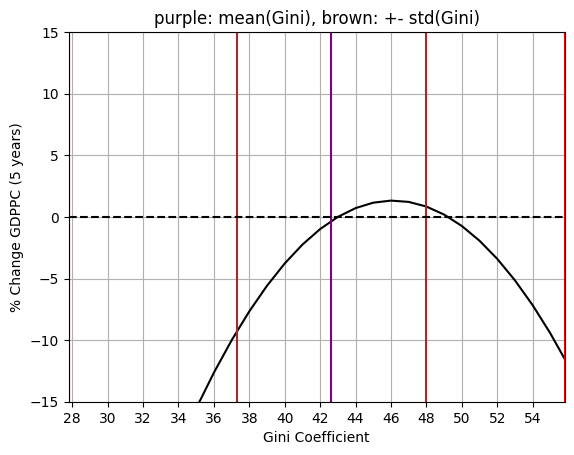

In [120]:
#X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "IVlnG2Gm5", "IVlnG2G2m5", "IVlnG2G3m5", 'lnGDPPC2m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
#X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "d5pGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'FDIavg', 'GFDIavg', 'G2FDIavg']].replace(0,np.nan).dropna()
#X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'RelGDPPCm5', 'IVRelGGm5', 'IVRelGG2m5']].replace(0,np.nan).dropna()
X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
X = X.groupby('Country').filter(lambda x: len(x) >= 5) #remove countries with less then 4 data points
X = X.groupby('Year').filter(lambda x: len(x) >= 10) #remove years with less then 10 entries
X = X[X.Country.isin(CountryList)] #make sure that the country is in our list of countries
X.to_csv("tansferdata.csv")
dummYear = pd.get_dummies(X.Year).fillna(0)
dummCountry = pd.get_dummies(X.Country).fillna(0)
X2 = pd.concat([X.drop(columns = ['Year', 'Country']), dummYear, dummCountry ], axis=1)# dummy years + country
X2.columns = X2.columns.astype(str)
MAINmodel = linear_model.LinearRegression(fit_intercept=False)
X3 = X2.drop(columns = ['lnGDPPC'])
X3["B0"] = 1
reg = MAINmodel.fit(X3, X2['lnGDPPC'])
ission = pd.DataFrame(columns = X3.columns)
ission.loc[len(ission)] = reg.coef_
Arti = pd.DataFrame(columns = X.columns)
Arti['IVGinim5'] = range(1,100) ###This goes first!
Arti['Country'] = 'Gabon'
Arti['Year'] = 1990
Arti['lnGDPPCm5'] = 9
Arti['FDIavg'] = .2
#Arti['GDPPCm5'] = np.exp(Arti['lnGDPPCm5'][0])
#Arti['lnGDPPC2m5'] = Arti['lnGDPPCm5'] ** 2
Arti['n'] = X.n.mean()
Arti['OPS'] = X.OPS.mean()
#Arti['abs_red'] = X.abs_red.mean()
Arti['TWWIavg'] = X.TWWIavg.mean()
Arti['dpTWWIavg'] = X.dpTWWIavg.mean()
Arti['IVGini2m5'] = Arti['IVGinim5'] ** 2
#Arti['IVGini3m5'] = Arti['IVGinim5'] ** 3
Arti['IVlnGGm5'] = Arti['IVGinim5'] * Arti['lnGDPPCm5']
Arti['IVlnGG2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPCm5']

Arti['GFDIavg']  = Arti['FDIavg'] * Arti['IVGinim5']
Arti['G2FDIavg']  = Arti['FDIavg'] * Arti['IVGini2m5']
#Arti['IVlnGG3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPCm5']
"""
Arti['RelGDPPCm5'] = Arti['GDPPCm5'][0] / TGall[TGall.Year == Arti.Year[0]].GDPPCm5.max()
Arti['IVRelGGm5'] = Arti['RelGDPPCm5'] * Arti['IVGinim5']
Arti['IVRelGG2m5'] = Arti['RelGDPPCm5'] * Arti['IVGini2m5']
Arti['RellnGDPPCm5'] = Arti['lnGDPPCm5'][0] / X[X.Year == Arti.Year[0] - 5].lnGDPPC.max()
Arti['IVRellnGGm5'] = Arti['RellnGDPPCm5'] * Arti['IVGinim5']
Arti['IVRellnGG2m5'] = Arti['RellnGDPPCm5'] * Arti['IVGini2m5']
Arti['IVlnG2Gm5'] = Arti['IVGinim5'] * Arti['lnGDPPC2m5']
Arti['IVlnG2G2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPC2m5']
Arti['IVlnG2G3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPC2m5']
"""
Arti['pred'] = ission.B0[0] + ission[str(Arti['Year'][0])][0] + ission[Arti['Country'][0]][0] #str(Arti['Year'][0]) gets fixed effect for that year
for column in Arti.drop(columns = ["Year", "Country", "lnGDPPC", "pred"]): #, 'GDPPCm5'
    i = column
    Arti['pred'] = Arti['pred'] + (Arti[i]  * ission[i][0])
    
Arti['pred'] = Arti['pred'] - Arti['lnGDPPCm5']
Arti['pred'] = (Arti['pred']) * 100
Arti['pred'] = Arti['pred'] - Arti['pred'][int(X.IVGinim5.mean())] # make mean = 0
"""
Arti['pred'] = ( 5.319 + (Arti['IVGinim5'] * -2.107e-01) 
                #- meandelta
                #+ (Arti['Year'] * 3.901e-01)
                + (Arti['IVGini2m5'] * 3.420e-03)
                - (Arti['lnGDPPCm5'] * 3.430e-01) + (Arti['IVlnGGm5'] * 2.509e-02)
                + (Arti['IVlnGG2m5'] * -3.962e-04) + (Arti['n'] * 4.158e-03)
                + (Arti['OPS'] * 4.390e+03) + (Arti['TWWIavg'] * -5.826e-15) )
"""
ax = sns.lineplot(data=Arti[['IVGinim5', 'pred']], x = 'IVGinim5', y = 'pred', color = "Black")
ax.set_xticks(range(0,101, 2))
#ax.set_yticks(range(-20, 111, 10))
ax.axvline(x = X.IVGinim5.min(),    # Line on x = 2
        ymin = 100, # Bottom of the plot
        ymax = -100,
        color = 'red') # Top of the plot
ax.axvline(x = X.IVGinim5.max(),    # Line on x = 2
        ymin = 100, # Bottom of the plot
        ymax = -100,
        color = 'red') # Top of the plot
ax.axvline(x = X.IVGinim5.mean(),    # Line on x = 2
        ymin = 100, # Bottom of the plot
        ymax = -100,
        color = 'purple') # Top of the plot
ax.axvline(x = X.IVGinim5.mean() - X.IVGinim5.std(),    # Line on x = 2
        ymin = 100, # Bottom of the plot
        ymax = -100,
        color = 'brown') # Top of the plot
ax.axvline(x = X.IVGinim5.mean() + X.IVGinim5.std(),    # Line on x = 2
        ymin = 100, # Bottom of the plot
        ymax = -100,
        color = 'brown') # Top of the plot
ax.axhline(y = 0, color = "black", linestyle = '--')   # Line on x = 2ymin = 100, # Bottom of the plot ymax = -100, color = 'purple') # Top of the plot
ax.set_ylim(Arti['pred'][int(X.IVGinim5.mean())]-15, Arti['pred'][int(X.IVGinim5.mean())]+15)
ax.set_xlim(X.IVGinim5.min(), X.IVGinim5.max())
ax.set_xlabel("Gini Coefficient")
ax.set_ylabel("% Change GDPPC (5 years)")
ax.set_title("purple: mean(Gini), brown: +- std(Gini)")
plt.grid()
plt.show()
## Create a column that has the max of each year for relative gdppc
##Answers don't make sense with IV that I created
## Answers don't make sense when whne taken to the the third degree

<Axes: xlabel='lnGDPPCm5', ylabel='Count'>

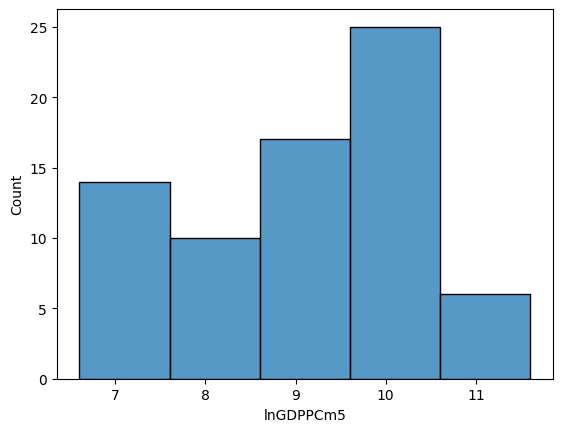

In [ ]:
ed = X[X.lnGDPPC < 100]
#ed = ed[ed.lnGDPPCm5 > 8.5]
ed = ed[ed.Year == 2018]
ed['dpGDPPC'] = ed['lnGDPPC'] - ed['lnGDPPCm5']
ed[['Country', 'lnGDPPCm5', 'IVGinim5', 'dpGDPPC']]
sns.histplot(ed.lnGDPPCm5, binwidth= 1)
#sns.scatterplot(data = ed, x = 'IVGinim5', y = 'dpGDPPC')

In [ ]:
def mainReg(lnGDPPCm5):
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "IVlnG2Gm5", "IVlnG2G2m5", "IVlnG2G3m5", 'lnGDPPC2m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "d5pGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
    X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'RelGDPPCm5', 'IVRelGGm5', 'IVRelGG2m5']].replace(0,np.nan).dropna()

    X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
    X = X.groupby('Country').filter(lambda x: len(x) >= 5) #remove countries with less then 4 data points
    X = X.groupby('Year').filter(lambda x: len(x) >= 10) #remove years with less then 10 entries
    X = X[X.Country.isin(CountryList)] #make sure that the country is in our list of countries
    X.to_csv("tansferdata.csv")
    dummYear = pd.get_dummies(X.Year).fillna(0)
    dummCountry = pd.get_dummies(X.Country).fillna(0)
    X2 = pd.concat([X.drop(columns = ['Year', 'Country']), dummYear, dummCountry ], axis=1)# dummy years + country
    X2.columns = X2.columns.astype(str)
    MAINmodel = linear_model.LinearRegression(fit_intercept=False)
    X3 = X2.drop(columns = ['lnGDPPC'])
    X3["B0"] = 1
    reg = MAINmodel.fit(X3, X2['lnGDPPC'])
    ission = pd.DataFrame(columns = X3.columns)
    ission.loc[len(ission)] = reg.coef_

    Arti = pd.DataFrame(columns = X.columns)

    Arti['IVGinim5'] = range(1,100) ###This goes first!

    Arti['Country'] = 'Gabon'
    Arti['Year'] = 1990
    Arti['lnGDPPCm5'] = lnGDPPCm5
    #Arti['GDPPCm5'] = np.exp(Arti['lnGDPPCm5'][0])

    #Arti['lnGDPPC2m5'] = Arti['lnGDPPCm5'] ** 2
    Arti['n'] = X.n.mean()
    Arti['OPS'] = X.OPS.mean()
    #Arti['abs_red'] = X.abs_red.mean()
    Arti['TWWIavg'] = X.TWWIavg.mean()
    Arti['dpTWWIavg'] = X.dpTWWIavg.mean()

    Arti['IVGini2m5'] = Arti['IVGinim5'] ** 2
    #Arti['IVGini3m5'] = Arti['IVGinim5'] ** 3

    Arti['IVlnGGm5'] = Arti['IVGinim5'] * Arti['lnGDPPCm5']
    Arti['IVlnGG2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPCm5']
    #Arti['IVlnGG3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPCm5']

    """
    Arti['RelGDPPCm5'] = Arti['GDPPCm5'][0] / TGall[TGall.Year == Arti.Year[0]].GDPPCm5.max()
    Arti['IVRelGGm5'] = Arti['RelGDPPCm5'] * Arti['IVGinim5']
    Arti['IVRelGG2m5'] = Arti['RelGDPPCm5'] * Arti['IVGini2m5']


    Arti['RellnGDPPCm5'] = Arti['lnGDPPCm5'][0] / X[X.Year == Arti.Year[0] - 5].lnGDPPC.max()
    Arti['IVRellnGGm5'] = Arti['RellnGDPPCm5'] * Arti['IVGinim5']
    Arti['IVRellnGG2m5'] = Arti['RellnGDPPCm5'] * Arti['IVGini2m5']

    Arti['IVlnG2Gm5'] = Arti['IVGinim5'] * Arti['lnGDPPC2m5']
    Arti['IVlnG2G2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPC2m5']
    Arti['IVlnG2G3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPC2m5']
    """

    Arti['pred'] = ission.B0[0] + ission[str(Arti['Year'][0])][0] + ission[Arti['Country'][0]][0] #str(Arti['Year'][0]) gets fixed effect for that year
    for column in Arti.drop(columns = ["Year", "Country", "lnGDPPC", "pred"]): #, 'GDPPCm5'
        i = column
        Arti['pred'] = Arti['pred'] + (Arti[i]  * ission[i][0])
        
    Arti['pred'] = Arti['pred'] - Arti['lnGDPPCm5']
    Arti['pred'] = (Arti['pred']) * 100
    Arti['pred'] = Arti['pred']# - Arti['pred'][int(X.IVGinim5.mean())] # make mean = 0
    """
    Arti['pred'] = ( 5.319 + (Arti['IVGinim5'] * -2.107e-01) 
                    #- meandelta
                    #+ (Arti['Year'] * 3.901e-01)
                    + (Arti['IVGini2m5'] * 3.420e-03)
                    - (Arti['lnGDPPCm5'] * 3.430e-01) + (Arti['IVlnGGm5'] * 2.509e-02)
                    + (Arti['IVlnGG2m5'] * -3.962e-04) + (Arti['n'] * 4.158e-03)
                    + (Arti['OPS'] * 4.390e+03) + (Arti['TWWIavg'] * -5.826e-15) )
    """

    ax = sns.lineplot(data=Arti[['IVGinim5', 'pred']], x = 'IVGinim5', y = 'pred', color = "Black")
    ax.set_xticks(range(0,101, 2))
    #ax.set_yticks(range(-20, 111, 10))
    ax.axvline(x = X.IVGinim5.min(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'red') # Top of the plot
    ax.axvline(x = X.IVGinim5.max(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'red') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'purple') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean() - X.IVGinim5.std(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'brown') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean() + X.IVGinim5.std(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'brown') # Top of the plot
    ax.axhline(y = 0, color = "black", linestyle = '--')   # Line on x = 2ymin = 100, # Bottom of the plot ymax = -100, color = 'purple') # Top of the plot
    ax.set_ylim(Arti['pred'][int(X.IVGinim5.mean())]-15, Arti['pred'][int(X.IVGinim5.mean())]+15)
    ax.set_xlim(X.IVGinim5.min(), X.IVGinim5.max())
    ax.set_xlabel("Gini Coefficient")
    ax.set_ylabel("% Change GDPPC (5 years)")
    ax.set_title("purple: mean(Gini), brown: +- std(Gini)")
    plt.grid()
    #plt.show()

    ## Create a column that has the max of each year for relative gdppc

    ##Answers don't make sense with IV that I created
    ## Answers don't make sense when whne taken to the the third degree
    return Arti, X

C:\Users\joshu\AppData\Local\Temp\ipykernel_4440\2363578437.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ha.set_yticklabels(range(6,12+1))


Text(0.5, 0.92, '% Change GDPpc (5 years)')

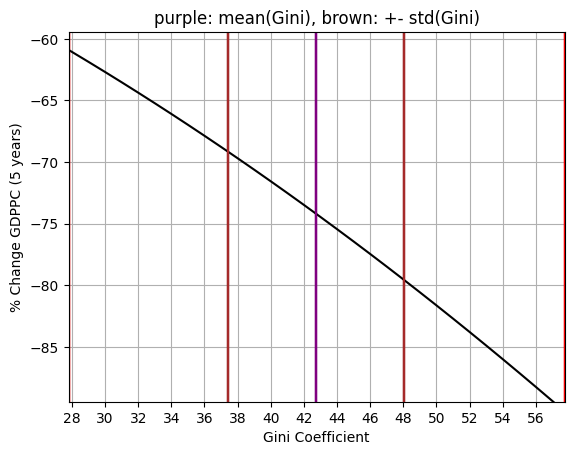

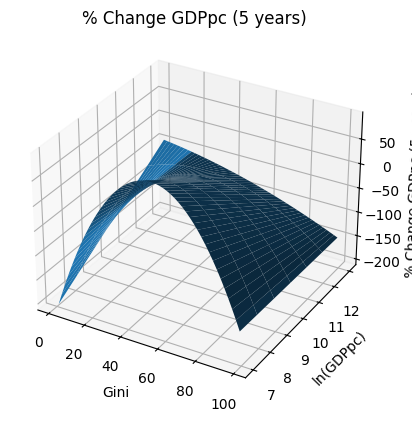

In [ ]:
size = 1
Arti, X = mainReg(6)
predList = [np.array(Arti['pred'])]
for i in range(6+size,12+size,size):
    Arti, X = mainReg(i)
    predList.append(np.array(Arti['pred']))

predList
ax = Axes3D(fig)

x = range(1,99+1)
y = range(1,7+1)

data = predList
#maxT = data.index(max(data))
#maxR = data[maxT].index(max(data[maxT]))
data = np.array(data)
#print(data)

hf = plt.figure()
ha = hf.add_subplot(projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

ha.set_xlabel('Gini')
ha.set_ylabel('ln(GDPpc)')
ha.set_zlabel('% Change GDPpc (5 years)')
ha.set_yticklabels(range(6,12+1))
ha.set_title('% Change GDPpc (5 years)')

In [128]:
def FinDevReg(lnGDPPCm5, FDIavg):
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "IVlnG2Gm5", "IVlnG2G2m5", "IVlnG2G3m5", 'lnGDPPC2m5', "n", "OPS", "TWWIavg"]].replace(0,np.nan).dropna()
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "d5pGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5', 'IVlnGG3m5', "n", "OPS", "TWWIavg", "dpTWWIavg"]].replace(0,np.nan).dropna()
    X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'FDIavg', 'GFDIavg', 'G2FDIavg']].replace(0,np.nan).dropna()
    #X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n", "OPS", "TWWIavg", "dpTWWIavg", 'RelGDPPCm5', 'IVRelGGm5', 'IVRelGG2m5']].replace(0,np.nan).dropna()
    X = X[(np.abs(stats.zscore(X.drop(columns = ["Year", "Country"]))) < 3).all(axis=1)]
    X = X.groupby('Country').filter(lambda x: len(x) >= 5) #remove countries with less then 4 data points
    X = X.groupby('Year').filter(lambda x: len(x) >= 10) #remove years with less then 10 entries
    X = X[X.Country.isin(CountryList)] #make sure that the country is in our list of countries
    X.to_csv("tansferdata.csv")
    dummYear = pd.get_dummies(X.Year).fillna(0)
    dummCountry = pd.get_dummies(X.Country).fillna(0)
    X2 = pd.concat([X.drop(columns = ['Year', 'Country']), dummYear, dummCountry ], axis=1)# dummy years + country
    X2.columns = X2.columns.astype(str)
    MAINmodel = linear_model.LinearRegression(fit_intercept=False)
    X3 = X2.drop(columns = ['lnGDPPC'])
    X3["B0"] = 1
    reg = MAINmodel.fit(X3, X2['lnGDPPC'])
    ission = pd.DataFrame(columns = X3.columns)
    ission.loc[len(ission)] = reg.coef_
    Arti = pd.DataFrame(columns = X.columns)
    Arti['IVGinim5'] = range(1,100) ###This goes first!
    Arti['Country'] = 'Gabon'
    Arti['Year'] = 1990
    Arti['lnGDPPCm5'] = lnGDPPCm5
    Arti['FDIavg'] = FDIavg
    #Arti['GDPPCm5'] = np.exp(Arti['lnGDPPCm5'][0])
    #Arti['lnGDPPC2m5'] = Arti['lnGDPPCm5'] ** 2
    Arti['n'] = X.n.mean()
    Arti['OPS'] = X.OPS.mean()
    #Arti['abs_red'] = X.abs_red.mean()
    Arti['TWWIavg'] = X.TWWIavg.mean()
    Arti['dpTWWIavg'] = X.dpTWWIavg.mean()
    Arti['IVGini2m5'] = Arti['IVGinim5'] ** 2
    #Arti['IVGini3m5'] = Arti['IVGinim5'] ** 3
    Arti['IVlnGGm5'] = Arti['IVGinim5'] * Arti['lnGDPPCm5']
    Arti['IVlnGG2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPCm5']

    Arti['GFDIavg']  = Arti['FDIavg'] * Arti['IVGinim5']
    Arti['G2FDIavg']  = Arti['FDIavg'] * Arti['IVGini2m5']
    #Arti['IVlnGG3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPCm5']
    """
    Arti['RelGDPPCm5'] = Arti['GDPPCm5'][0] / TGall[TGall.Year == Arti.Year[0]].GDPPCm5.max()
    Arti['IVRelGGm5'] = Arti['RelGDPPCm5'] * Arti['IVGinim5']
    Arti['IVRelGG2m5'] = Arti['RelGDPPCm5'] * Arti['IVGini2m5']
    Arti['RellnGDPPCm5'] = Arti['lnGDPPCm5'][0] / X[X.Year == Arti.Year[0] - 5].lnGDPPC.max()
    Arti['IVRellnGGm5'] = Arti['RellnGDPPCm5'] * Arti['IVGinim5']
    Arti['IVRellnGG2m5'] = Arti['RellnGDPPCm5'] * Arti['IVGini2m5']
    Arti['IVlnG2Gm5'] = Arti['IVGinim5'] * Arti['lnGDPPC2m5']
    Arti['IVlnG2G2m5'] = Arti['IVGini2m5'] * Arti['lnGDPPC2m5']
    Arti['IVlnG2G3m5'] = Arti['IVGini3m5'] * Arti['lnGDPPC2m5']
    """
    Arti['pred'] = ission.B0[0] + ission[str(Arti['Year'][0])][0] + ission[Arti['Country'][0]][0] #str(Arti['Year'][0]) gets fixed effect for that year
    for column in Arti.drop(columns = ["Year", "Country", "lnGDPPC", "pred"]): #, 'GDPPCm5'
        i = column
        Arti['pred'] = Arti['pred'] + (Arti[i]  * ission[i][0])
        
    Arti['pred'] = Arti['pred'] - Arti['lnGDPPCm5']
    Arti['pred'] = (Arti['pred']) * 100
    Arti['pred'] = Arti['pred'] #- Arti['pred'][int(X.IVGinim5.mean())] # make mean = 0
    """
    Arti['pred'] = ( 5.319 + (Arti['IVGinim5'] * -2.107e-01) 
                    #- meandelta
                    #+ (Arti['Year'] * 3.901e-01)
                    + (Arti['IVGini2m5'] * 3.420e-03)
                    - (Arti['lnGDPPCm5'] * 3.430e-01) + (Arti['IVlnGGm5'] * 2.509e-02)
                    + (Arti['IVlnGG2m5'] * -3.962e-04) + (Arti['n'] * 4.158e-03)
                    + (Arti['OPS'] * 4.390e+03) + (Arti['TWWIavg'] * -5.826e-15) )
    """
    ax = sns.lineplot(data=Arti[['IVGinim5', 'pred']], x = 'IVGinim5', y = 'pred', color = "Black")
    ax.set_xticks(range(0,101, 2))
    #ax.set_yticks(range(-20, 111, 10))
    ax.axvline(x = X.IVGinim5.min(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'red') # Top of the plot
    ax.axvline(x = X.IVGinim5.max(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'red') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'purple') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean() - X.IVGinim5.std(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'brown') # Top of the plot
    ax.axvline(x = X.IVGinim5.mean() + X.IVGinim5.std(),    # Line on x = 2
            ymin = 100, # Bottom of the plot
            ymax = -100,
            color = 'brown') # Top of the plot
    ax.axhline(y = 0, color = "black", linestyle = '--')   # Line on x = 2ymin = 100, # Bottom of the plot ymax = -100, color = 'purple') # Top of the plot
    ax.set_ylim(Arti['pred'][int(X.IVGinim5.mean())]-15, Arti['pred'][int(X.IVGinim5.mean())]+15)
    ax.set_xlim(X.IVGinim5.min(), X.IVGinim5.max())
    ax.set_xlabel("Gini Coefficient")
    ax.set_ylabel("% Change GDPPC (5 years)")
    ax.set_title("purple: mean(Gini), brown: +- std(Gini)")
    plt.grid()
    #plt.show()
    ## Create a column that has the max of each year for relative gdppc
    ##Answers don't make sense with IV that I created
    ## Answers don't make sense when whne taken to the the third degree
    return Arti, X

Text(0.5, 0.92, '% Change GDPpc (5 years)')

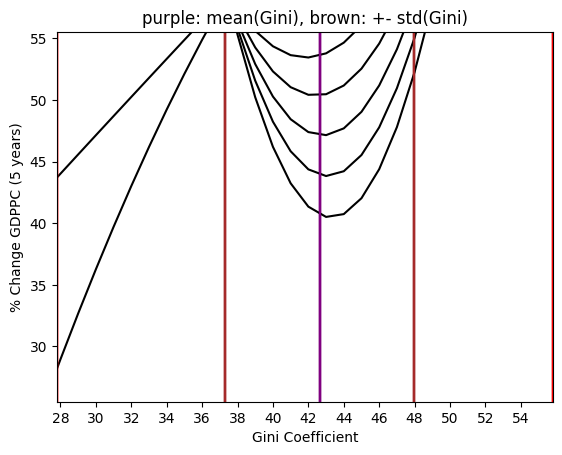

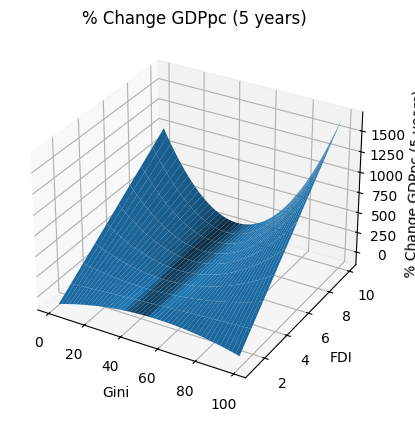

In [142]:
size = 1
lnGDPPCm5 = 7
Arti, X = FinDevReg(lnGDPPCm5 , .1)
predList = [np.array(Arti['pred'])]
for i in range(1+size,10+size,size):
    Arti, X = FinDevReg(lnGDPPCm5, i * .1)
    predList.append(np.array(Arti['pred']))

predList
ax = Axes3D(fig)

x = range(1,99+1)
y = range(1,10+1)

data = predList
#maxT = data.index(max(data))
#maxR = data[maxT].index(max(data[maxT]))
data = np.array(data)
#print(data)

hf2 = plt.figure()
ha2 = hf2.add_subplot(projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha2.plot_surface(X, Y, data)

ha2.set_xlabel('Gini')
ha2.set_ylabel('FDI')
ha2.set_zlabel('% Change GDPpc (5 years)')
#ha2.set_yticklabels(range(1,10+1))
ha2.set_title('% Change GDPpc (5 years)')


In [ ]:
sns.histplot((X[X.Year == 2005]).IVGinim5, binwidth=1)

AttributeError: 'numpy.ndarray' object has no attribute 'Year'

In [ ]:
Arti

,Year,Country,IVlnGGm5,IVGinim5,lnGDPPC,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,dpTWWIavg,abs_red,pred
0,1990,Gabon,7,1,NaN,7,1,7,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-178.838671
1,1990,Gabon,14,2,NaN,7,4,28,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-169.247548
2,1990,Gabon,21,3,NaN,7,9,63,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-159.846810
3,1990,Gabon,28,4,NaN,7,16,112,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-150.636457
4,1990,Gabon,35,5,NaN,7,25,175,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-141.616490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1990,Gabon,665,95,NaN,7,9025,63175,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-109.448848
95,1990,Gabon,672,96,NaN,7,9216,64512,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-117.753979
96,1990,Gabon,679,97,NaN,7,9409,65863,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-126.249495
97,1990,Gabon,686,98,NaN,7,9604,67228,1.320875,1.196481e-08,126679.304056,0.000002,7.593991,-134.935396


In [ ]:
ission

,IVlnGGm5,IVGinim5,lnGDPPCm5,IVGini2m5,IVlnGG2m5,n,OPS,TWWIavg,dpTWWIavg,abs_red,...,Togo,Trinidad and Tobago,Tunisia,Uganda,Ukraine,United Arab Emirates,Uruguay,Zambia,Zimbabwe,B0
0,-0.020687,0.243577,1.290667,-0.002201,0.000178,0.012046,211618.003595,-1.144359e-07,20514.618405,-0.014276,...,-0.71433,0.180322,-0.038274,-0.559581,0.10037,0.368,0.167347,-0.58037,-0.81274,-3.780802


In [ ]:
len(X.Country.unique())

95

In [ ]:
X = TGall[["Year", "Country", "GHDIm5","Ginim5", "lnHDI", "lnHDIm5", 'Gini2m5', 'GHDI2m5', "n"]].replace(0,np.nan).dropna()
X.to_csv("huuu.csv")

In [ ]:
X = TGall[["Year", "Country", "gini_mkt", "gini_disp", "lnGDPPC", "n"]].replace(0,np.nan).dropna()
X = X[X["Country"]=="Brazil"]
X[["lnGDPPC", "gini_mkt", "gini_disp", "n"]].describe()

,lnGDPPC,gini_mkt,gini_disp,n
count,58.000000,58.000000,58.000000,58.000000
mean,8.994083,60.858621,51.318966,1.820991
std,0.433292,2.245075,2.331136,0.690498
min,8.184514,55.800000,46.300000,0.792263
25%,8.810292,59.925000,50.625000,1.150962
50%,9.016694,61.250000,51.500000,1.842507
75%,9.287094,62.250000,52.825000,2.361764
max,9.669409,64.200000,55.300000,3.015260


In [ ]:
len(tfp_gini["Country"].unique())

222

In [ ]:
men = TGall.replace(0,np.nan).describe()

Text(0.5, 0, 'Gini')

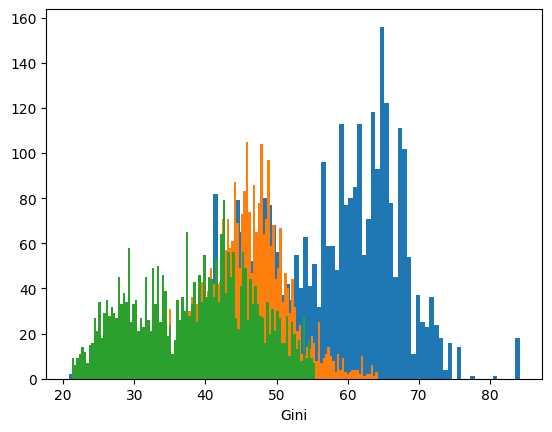

In [ ]:
wiid = TGall.WIID.replace(0,np.nan).mul(100).dropna()
gini_disp = TGall.gini_disp.replace(0,np.nan).dropna()
gini_mkt = TGall.gini_mkt.replace(0,np.nan).dropna()
#plt.style.use('dark_background')

plt.hist(wiid, 100)
plt.hist(gini_mkt, 100)
plt.hist(gini_disp, 100)

plt.xlabel("Gini")

In [ ]:
cd("Serbia").tail()

[WinError 123] The filename, directory name, or volume label syntax is incorrect: '("Serbia").tail()'
c:\Users\joshu\UBC\H\GonGrowth


In [ ]:
tfp_giniCC = tfp_gini.dropna()
CC = TGall.dropna()

We could build a model for inequality without gdp or income

# More Variable

In [ ]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(tfp_gini, x_vars=['TFP', 'Gini'], 
#            y_vars='Country', size=20, aspect=.5, kind='scatter')
#plt.show()

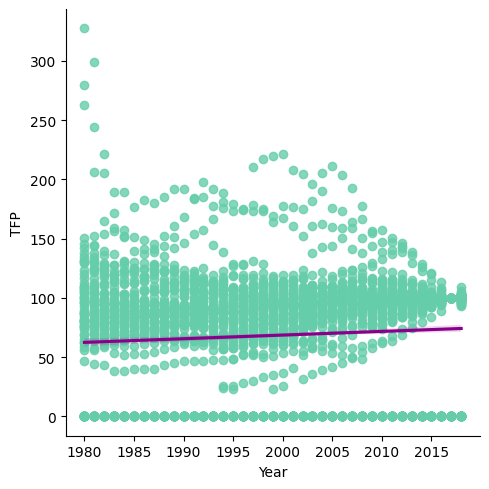

In [ ]:
sns.lmplot(data=TGall[TGall["Year"] >= 1980], x="Year", y="TFP", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

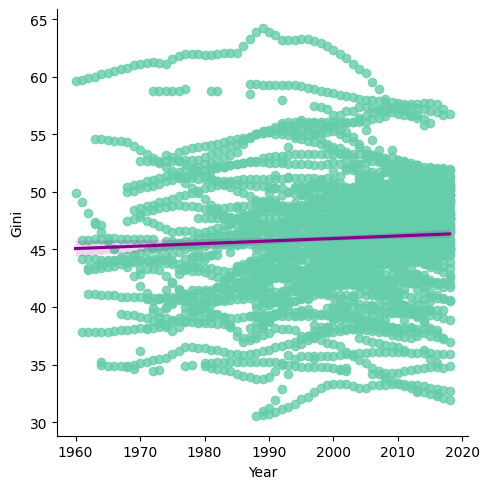

In [ ]:
sns.lmplot(data=TGC(["Gini"],Year = True), x="Year", y="Gini", line_kws={'color': 'darkmagenta'}, scatter_kws = {'color' : 'mediumaquamarine'})#, size = 10)

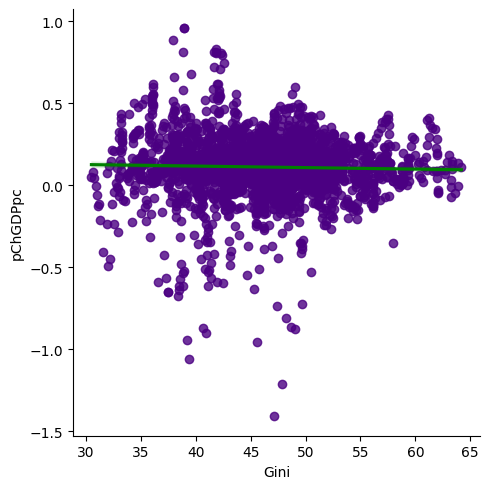

In [ ]:
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
edc = TGall[["lnGDPPC", "Gini", "lnGDPPCm5"]].replace(0,np.nan).dropna(axis = 0)
#edc.tail(50)
edc["pChGDPpc"] = TGall["lnGDPPC"] - TGall["lnGDPPCm5"]
edc = edc[(edc["Gini"] <= -.01) | (edc["Gini"] >= .01)]
sns.lmplot(data=edc, x="Gini", y="pChGDPpc", line_kws={'color': 'green'}, scatter_kws = {'color' : 'indigo'})#, size = 10)

In [ ]:
#sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "Gini"]), x="dpGDPPC", y="Gini", order = 2, line_kws={'color': 'purple'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)

In [ ]:
#TGC(["dpTFP", "lnGDPPC", "Gini"])

In [ ]:
#sns.lmplot(data=TGC(["dpTFP", "dpGDPPC", "dpGini"]), x="dpGDPPC", y="dpGini", line_kws={'color': 'indigo'}, scatter_kws = {'color' : 'green'})#, size = 10)

In [ ]:
#sns.lmplot(data=TGC(["TFP", "-Gini"]), y="TFP", x="-Gini", order = 2, line_kws={'color': 'firebrick'}, scatter_kws = {'color' : 'darkorange'})#, size = 10)


In [ ]:
#sns.lmplot(data=TGC(["dpTFP", "-Gini"]), x="dpTFP", y="-Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

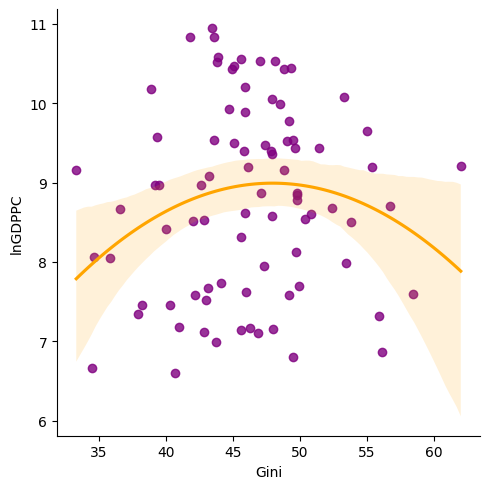

In [ ]:
sns.lmplot(data=TGall[TGall["Year"] == 2001], y="lnGDPPC", x="Gini", order = 2, line_kws={'color': 'orange'}, scatter_kws = {'color' : 'purple'})#, size = 10)

In [ ]:
# sns.lmplot(data=cd(), x="TFP", y="Gini")

In [ ]:
"""
from scipy import stats
penguins = sns.load_dataset("penguins")

sns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")
"""

'\nfrom scipy import stats\npenguins = sns.load_dataset("penguins")\n\nsns.jointplot(data=cd(), x="TFP", y="Gini", kind = "reg")\n'

## dTFP and dGini
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

In [ ]:
#def r2(x, y):
#    return stats.pearsonr(x, y)[0] ** 2

# r2(CC.dgdppc, CC.dGini)

In [ ]:
#sns.regplot(data=tfp_gini, x="dTFP", y="Gini")

In [ ]:
# mmm = sns.regplot(data=tfp_gini, x="dTFP", y="dGini", order=2)

# ML Regression

In [ ]:
"""
from ctypes import sizeof


fig=plt.figure(figsize=(15, 15))
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")
ax.set_xlabel("Gini")
ax.set_ylabel("dpTFP")
ax.set_zlabel("dpGDPPC")
plt.show()
"""

'\nfrom ctypes import sizeof\n\n\nfig=plt.figure(figsize=(15, 15))\nax=fig.add_subplot(111,projection=\'3d\')\nn=100\nax.scatter(TGall["Gini"],TGall["dpTFP"],TGall["dpGDPPC"],color="red")\nax.set_xlabel("Gini")\nax.set_ylabel("dpTFP")\nax.set_zlabel("dpGDPPC")\nplt.show()\n'

In [ ]:
"""
# Predicting values:
# Function for predicting future values
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

# Checking various accuracy:
from sklearn.metrics import r2_score 
test_x = np.array(test[['dTFP']]) 
test_y = np.array(test[['dGini']]) 
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
"""

'\n# Predicting values:\n# Function for predicting future values\ndef get_regression_predictions(input_features,intercept,slope):\n    predicted_values = input_features*slope + intercept\n    return predicted_values\n\n# Checking various accuracy:\nfrom sklearn.metrics import r2_score \ntest_x = np.array(test[[\'dTFP\']]) \ntest_y = np.array(test[[\'dGini\']]) \ntest_y_ = regr.predict(test_x)\nprint("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))\nprint("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))\nprint("R2-score: %.2f" % r2_score(test_y_ , test_y) )\n'

# Machine learning 2
https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171

In [ ]:
"""
X = tfp_giniCC[["dTFP"]]
y = tfp_giniCC["dGini"]
X.head()
"""

'\nX = tfp_giniCC[["dTFP"]]\ny = tfp_giniCC["dGini"]\nX.head()\n'

In [ ]:
#Initiate the theta values.
theta = np.array([0]*len(X.columns))

#number of training data
m = len(X)

def hypothesis(theta, X):
    return theta*X

#Define the cost function
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [ ]:
#Predict Outputs
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)
y

Series([], Name: dGini, dtype: float64)

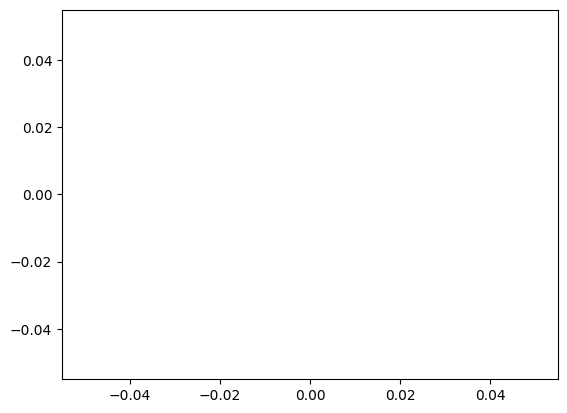

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x = list(range(0, len(y))), y= y, color='blue')         
plt.scatter(x=list(range(0, len(y))), y=y_hat, color='darkred')
plt.show()

## Simple Linear Regression

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [ ]:
X = TGC(["lnGDPPC", "Gini"])
model = LinearRegression()
reg = model.fit(X['lnGDPPC'].values.reshape(-1, 1), X['Gini'].values.reshape(-1, 1))
y_pred = reg.predict(X['lnGDPPC'].values.reshape(-1, 1))
y_pred

array([[45.9144363 ],
       [45.91607968],
       [45.91476646],
       ...,
       [45.9277504 ],
       [45.92731526],
       [45.92706034]])

In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5"]].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.183e+04
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:52:13   Log-Likelihood:                 999.88
No. Observations:                2578   AIC:                            -1992.
Df Residuals:                    2574   BIC:                            -1968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4189      0.087     16.297      0.0

In [ ]:
X

,IVlnGG,IVGinim5,lnGDPPC,lnGDPPCm5
41,383.523909,44.043403,8.572781,8.285434
42,386.852871,44.286653,8.632121,8.168199
43,391.429102,44.352092,8.700289,8.261881
44,395.974533,44.502387,8.767153,8.396616
45,399.627324,44.572313,8.833239,8.478136
...,...,...,...,...
5804,344.953163,46.759124,7.374002,7.158550
5805,344.003040,46.727028,7.352441,7.245553
5806,343.995722,46.598394,7.335634,7.323171
5807,345.367065,46.677334,7.366677,7.380256


In [ ]:
X = TGall[["IVlnGG","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5']].replace(0,np.nan).dropna()
X2 = sm.add_constant(X.drop(columns = ["lnGDPPC"]))
est = sm.OLS(X.lnGDPPC, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnGDPPC   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.518e+04
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:52:13   Log-Likelihood:                 1004.8
No. Observations:                2578   AIC:                            -1998.
Df Residuals:                    2572   BIC:                            -1962.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2978      0.174      7.455      0.0

In [ ]:
X = TGall[["Year", "Country", "IVlnGGm5","IVGinim5", "lnGDPPC", "lnGDPPCm5", 'IVGini2m5', 'IVlnGG2m5', "n"]].replace(0,np.nan).dropna()
X = X[X.lnGDPPC > 10]
X.to_csv("tansferdata.csv")

In [ ]:
#( len(TGall['OilP'].dropna()) - len(TGall.Gini.dropna()) )/ len(TGall.Gini.dropna()) # lose 32% of data when OilP is included

In [ ]:
TGC(["IVlnGG"]).mean()

IVlnGG    380.879962
dtype: float64

In [ ]:
y = "lnGDPPC"
X = TGC(["Ginim5", "lnGGm5", "lnGDPPCm5", y], Year = True)

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
print(est2.predict())


[8.40026853 8.2835532  8.37932799 ... 7.45010038 7.50906543 7.51042438]


In [ ]:
y = "Gini"
X = TGC(["lnGDPPC", y])

X2 = sm.add_constant(X.drop(columns = [y]))
est = sm.OLS(X[y], X2)
est2 = est.fit()
#print(est2.summary())
est2.predict([50,70])

array([2300.54774516])

### Extremly predictive, dTFP on Gini

run on several years avg

Taxes, democracy, news freedom as control variable

In [ ]:
#TGall.tail().drop(columns = ["Year", "Country", ])
TGall["lnGDPPC"].mean()

8.404714235551387

In [ ]:
#Average standard deviation per gini coefficient
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["Gini"], country = x)
    std += temp["Gini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [ ]:
tfp_gini.Gini.std()

6.4588131600951115

In [ ]:
# Avg std for dNGini
std = 0
for x in tfp_gini["Country"].unique():
    temp = TGCc(["dNGini"], country = x)
    std += temp["dNGini"].std()

print(std / tfp_gini["Country"].unique().size)

nan


In [ ]:
"""
X = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)
X2 = sm.add_constant(X.drop(columns = ("dpGini")))
est = sm.OLS(X["dpGini"], X2)
est2 = est.fit()
print(est2.summary())
"""

'\nX = TGC(["dpTFP", "dpGini", "GDPPC", "dGDPPC", "dpGDPPC"], FE = False, Year = True)\nX2 = sm.add_constant(X.drop(columns = ("dpGini")))\nest = sm.OLS(X["dpGini"], X2)\nest2 = est.fit()\nprint(est2.summary())\n'

## Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [ ]:
TGall.columns

Index(['Country', 'Year', 'CTFP', 'CWTFP', 'TFP', 'WTFP', 'Gini', 'gini_disp',
       'gini_disp_se', 'gini_mkt', 'gini_mkt_se', 'abs_red', 'abs_red_se',
       'rel_red', 'rel_red_se', 'WIID', '-Gini', 'dGini', 'd5Gini', 'dpGini',
       'd5pGini', 'dNGini', 'dpGinim5', 'Ginim5', 'GDPPC_x', 'pop_x', 'GDP_x',
       'RelGDPPC', 'dGDPPC', 'd5GDPPC', 'dpGDPPC', 'd5pGDPPC', 'dpGDPPC^2',
       'lnGDPPC', 'RellnGDPPC', 'RellnGDPPCm5', 'GDPPCm5', 'Gini2m5', 'lnGG',
       'lnGGm5', 'lnGDPPCm5', 'RellnGGm5', 'RellnGG2m5', 'TWWI', 'dpTWWI',
       'TWWIavg', 'dpTWWIavg', 'TMITR', 'Oil', 'GDPPC', 'pop_y', 'GDP_y',
       'RelGDPPC_y', 'OdivGDP', 'OilW', 'Price', 'lnP', 'dlnP', 'OilP', 'OlnP',
       'OilWP', 'OPS', 'lnGDPPC2', 'lnGDPPC2m5', 'IVGini', 'IVGinim5',
       'IVlnGG', 'IVlnGGm5', 'IVGini2m5', 'IVlnGG2m5', 'IVGini3m5',
       'IVlnGG3m5', 'IVRellnGGm5', 'IVRellnGG2m5', 'RelGDPPCm5', 'IVRelGGm5',
       'IVRelGG2m5', 'iso3', 'hdicode', 'region', 'HDI', 'Country Code', 'GNI',
       'l

In [ ]:
rdf = TGall[["Year", "Country", "IVGinim5", "IVGini2m5", "lnGDPPC", "lnGDPPCm5", "abs_red", "n"]].replace(0,np.nan).dropna().reset_index(drop=True)
len(rdf.Country.unique())

98

In [ ]:
#interaction variables
irdf = rdf.drop(["lnGDPPC", "Year", "Country"], axis = 1)

variables = irdf.columns
df_interaction = irdf
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        df_interaction[f'{variables[i]}*{variables[j]}'] = irdf[variables[i]] * irdf[variables[j]]
        
irdf = pd.concat([rdf[["Country", "lnGDPPC", "Year"]], df_interaction], axis=1).drop(["IVGinim5*IVGini2m5"], axis = 1)
irdf = pd.get_dummies(irdf, columns=['Country'], prefix='', prefix_sep='')
irdf["Intercept"] = 1
irdf

,lnGDPPC,Year,IVGinim5,IVGini2m5,lnGDPPCm5,abs_red,n,IVGinim5*lnGDPPCm5,IVGinim5*abs_red,IVGinim5*n,...,Trinidad and Tobago,Tunisia,Turkmenistan,Uganda,Ukraine,United Arab Emirates,Uruguay,Zambia,Zimbabwe,Intercept
0,8.572781,2001,44.043403,1939.821355,8.285434,10.9,-0.938470,364.918707,480.073094,-41.333431,...,0,0,0,0,0,0,0,0,0,1
1,8.632121,2002,44.286653,1961.307592,8.168199,10.8,-0.299877,361.742184,478.295847,-13.280535,...,0,0,0,0,0,0,0,0,0,1
2,8.700289,2003,44.352092,1967.108068,8.261881,10.9,-0.374149,366.431708,483.437803,-16.594298,...,0,0,0,0,0,0,0,0,0,1
3,8.767153,2004,44.502387,1980.462425,8.396616,11.1,-0.417931,373.669445,493.976493,-18.598944,...,0,0,0,0,0,0,0,0,0,1
4,8.833239,2005,44.572313,1986.691075,8.478136,11.1,-0.511790,377.890140,494.752673,-22.811669,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,7.374002,2014,46.759124,2186.415689,7.158550,2.4,2.191391,334.727540,112.221898,102.467526,...,0,0,0,0,0,0,0,0,1,1
2571,7.352441,2015,46.727028,2183.415133,7.245553,2.4,2.136294,338.563143,112.144867,99.822680,...,0,0,0,0,0,0,0,0,1,1
2572,7.335634,2016,46.598394,2171.410290,7.323171,2.4,2.081806,341.247992,111.836145,97.008803,...,0,0,0,0,0,0,0,0,1,1
2573,7.366677,2017,46.677334,2178.773534,7.380256,2.4,2.043620,344.490666,112.025602,95.390729,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(irdf.drop('lnGDPPC', axis=1))
y = irdf['lnGDPPC'].values

ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=10)
ridge.fit(X, y)

feature_names = list(irdf.drop('lnGDPPC', axis=1).columns)
ridge_coeff_df = pd.DataFrame(ridge.coef_, index=feature_names, columns=['Coefficient'])

ridge_coeff_df.head(30)

,Coefficient
Year,0.106850
IVGinim5,-0.084813
IVGini2m5,-0.096785
lnGDPPCm5,0.458769
abs_red,0.035858
n,-0.024364
IVGinim5*lnGDPPCm5,0.228010
IVGinim5*abs_red,0.016796
IVGinim5*n,-0.039385
IVGini2m5*lnGDPPCm5,0.065734


In [ ]:
X_df = pd.DataFrame(X, columns = irdf.drop('lnGDPPC', axis=1).columns)
X_df.columns[0:20]

Index(['Year', 'IVGinim5', 'IVGini2m5', 'lnGDPPCm5', 'abs_red', 'n',
       'IVGinim5*lnGDPPCm5', 'IVGinim5*abs_red', 'IVGinim5*n',
       'IVGini2m5*lnGDPPCm5', 'IVGini2m5*abs_red', 'IVGini2m5*n',
       'lnGDPPCm5*abs_red', 'lnGDPPCm5*n', 'abs_red*n', 'Albania', 'Algeria',
       'Argentina', 'Armenia', 'Australia'],
      dtype='object')

In [ ]:
print(X_df.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0][2])
print(scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)[0][2])
#print(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].values[0])

0.0971366341785087
0.0971366341785087


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = ridge.predict((scaler.transform(irdf.iloc[irdf[(irdf.Year ==  2018) & (irdf.Canada == 1)].index].drop('lnGDPPC', axis = 1).values)).reshape(1, -1))
print(prediction)

[10.89415049]


c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
def mlCo(Country):
    df = irdf[(irdf.Year ==  2018) & (irdf[Country] == 1)].drop('lnGDPPC', axis = 1)
    pred = pd.DataFrame(columns=["Gini", "pred"])
    
    ## have to edit all vectors that are multiplied by Gini
    for i in range(1,101):
        g = df.IVGinim5.values[0]
        for r in df.columns:
            if "IVGini2m5" in r:
                df[r] = df[r].div(g**2).mul(i**2)
            elif "IVGinim5" in r:
                df[r] = df[r].div(g).mul(i)
        
        tdf = scaler.transform(df.values.reshape(1, -1))
        pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
    return pred
        

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_2036\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_2036\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignor

c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_2036\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignore_index = True)
c:\Users\joshu\miniconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\joshu\AppData\Local\Temp\ipykernel_2036\1391394939.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred = pred.append({"Gini":i, "pred": (ridge.predict(tdf.reshape(1, -1))[0] - df.lnGDPPCm5.values[0])}, ignor

<Axes: xlabel='Gini', ylabel='pred'>

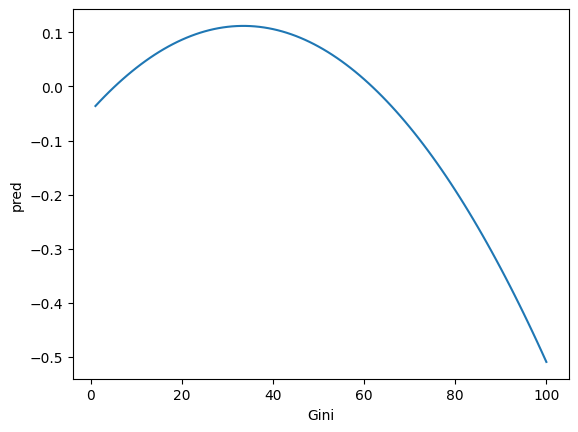

In [ ]:
fake = mlCo("Benin")
sns.lineplot(x = "Gini", y = "pred", data = fake)